In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [95]:
train_data=pd.read_csv("Dr_Fee_Train.csv")
pd.set_option("display.max_columns",None)
train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [96]:
train_data.shape

(5961, 7)

In [97]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [98]:
train_data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

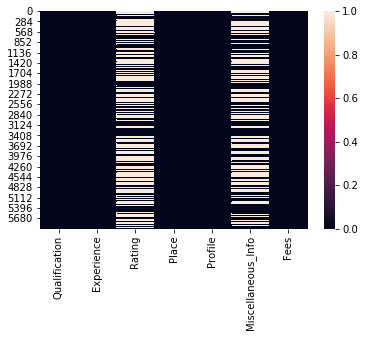

In [99]:
sns.heatmap(train_data.isnull())

In [100]:
train_data['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [101]:
train_data['Qualification'].value_counts()

BDS                                                                                     488
BHMS                                                                                    477
BAMS                                                                                    471
MBBS                                                                                    334
MBBS, MS - ENT                                                                          220
                                                                                       ... 
MD - Skin,VD & Leprosy, MBBS, DNB - Dermatology & Venereology                             1
MBBS, Diploma in Otorhinolaryngology (DLO), MS - ENT, FCPS - Mid. & Gynae, DNB - ENT      1
BHMS, Doctor of Homeopathic Medicine (HMD), Certificate in Child Health (CCH), CGO        1
BAMS, M. D. IN KAYACHIKISTA                                                               1
MBBS, MD - Dermatology, Diploma in Venereology                                  

In [102]:
# Splitting Qualification and fill null value with 'XX'
train_data['Q_1']=train_data['Qualification'].str.split(',').str[0]
train_data['Q_2']=train_data['Qualification'].str.split(',').str[1]
train_data['Q_3']=train_data['Qualification'].str.split(',').str[2]

In [103]:
train_data['Q_1'].fillna("XX",inplace=True)
train_data['Q_2'].fillna("XX",inplace=True)
train_data['Q_3'].fillna("XX",inplace=True)

In [104]:
train_data['Experience'].value_counts()

9 years experience     323
10 years experience    294
11 years experience    288
8 years experience     282
12 years experience    279
                      ... 
61 years experience      1
64 years experience      1
58 years experience      1
59 years experience      1
60 years experience      1
Name: Experience, Length: 64, dtype: int64

In [105]:
train_data['experience']=train_data['Experience'].str.slice(stop=2).astype(int)

In [106]:
train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Q_1,Q_2,Q_3,experience
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,MD - Homeopathy,XX,24
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,MD - Ayurveda Medicine,XX,12
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,MBBS,MS - Otorhinolaryngology,XX,9
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250,BSc - Zoology,BAMS,XX,12
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,XX,XX,20


In [107]:
train_data['Rating'].fillna('0%',inplace=True)

In [108]:
train_data['Rating']=train_data['Rating'].str.slice(stop=-1).astype(int)

In [109]:
train_data['Rating'].isnull().sum()

0

In [110]:
train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Q_1,Q_2,Q_3,experience
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,MD - Homeopathy,XX,24
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,MD - Ayurveda Medicine,XX,12
2,"MBBS, MS - Otorhinolaryngology",9 years experience,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,MBBS,MS - Otorhinolaryngology,XX,9
3,"BSc - Zoology, BAMS",12 years experience,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250,BSc - Zoology,BAMS,XX,12
4,BAMS,20 years experience,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,XX,XX,20


In [111]:
# Splitting Place into Locality and City
train_data['Locality']=train_data['Place'].str.split(',').str[0]
train_data['City']=train_data['Place'].str.split(',').str[1]

In [112]:
train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Q_1,Q_2,Q_3,experience,Locality,City
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,MD - Homeopathy,XX,24,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,MD - Ayurveda Medicine,XX,12,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9 years experience,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,MBBS,MS - Otorhinolaryngology,XX,9,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12 years experience,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250,BSc - Zoology,BAMS,XX,12,Bannerghatta Road,Bangalore
4,BAMS,20 years experience,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,XX,XX,20,Keelkattalai,Chennai


In [113]:
train_data['Locality'].fillna("XX",inplace=True)
train_data['City'].fillna("XX",inplace=True)

In [114]:
train_data['Locality'].isnull().sum()

0

In [115]:
train_data['City'].isnull().sum()

0

In [116]:
# Now dropping some useless cloumns
train_data.drop(['Qualification','Experience','Place','Miscellaneous_Info'],axis=1,inplace=True)

In [117]:
train_data.head(2)

,Rating,Profile,Fees,Q_1,Q_2,Q_3,experience,Locality,City
0,100,Homeopath,100,BHMS,MD - Homeopathy,XX,24,Kakkanad,Ernakulam
1,98,Ayurveda,350,BAMS,MD - Ayurveda Medicine,XX,12,Whitefield,Bangalore


In [118]:
train_data.isnull().sum()

Rating        0
Profile       0
Fees          0
Q_1           0
Q_2           0
Q_3           0
experience    0
Locality      0
City          0
dtype: int64

Handling Categorical Data

<Figure size 864x864 with 0 Axes>

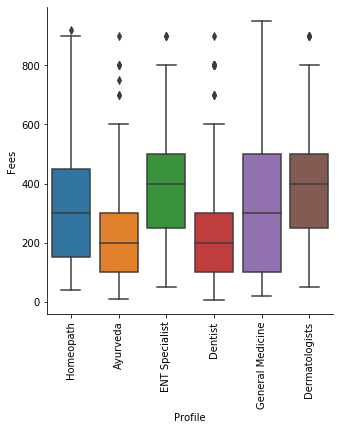

In [119]:
plt.figure(figsize=(12,12))
sns.catplot(x='Profile',y="Fees",data=train_data,kind="box")
plt.xticks(rotation=90)
plt.show()

In [120]:
train_data['Q_1'].value_counts()

MBBS                                           2448
BDS                                            1208
BAMS                                            711
BHMS                                            706
MD - Dermatology                                 84
                                               ... 
DNHE                                              1
Post Graduate Diploma in Diabetic Education       1
MSc - Endocrinology(UK)                           1
Diplomate of National Board Exam                  1
MA - Psychology                                   1
Name: Q_1, Length: 151, dtype: int64

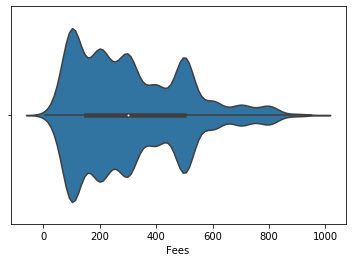

In [121]:
sns.violinplot(x='Fees',data=train_data)

In [122]:
train_data['Q_2'].value_counts()

XX                                                                  1962
 MS - ENT                                                            301
 MD - General Medicine                                               251
 MD - Dermatology                                                    244
 MBBS                                                                217
                                                                    ... 
 Fellowship in Endocrinology                                           1
 Post Graduate Diploma in Health                                       1
 Post Graduate Diploma in Clinical Nutrition & Dietetics               1
 Member of the Royal College of General Practitioners UK (MRCGP)       1
 Diploma in Diabetes                                                   1
Name: Q_2, Length: 427, dtype: int64

In [123]:
train_data['Q_3'].value_counts()

XX                                                                      4590
 Venereology & Leprosy                                                   185
 MBBS                                                                    114
 DNB - ENT                                                                68
 DNB - Dermatology & Venereology                                          35
                                                                        ... 
 MCh - Cardio Thoracic Surgery                                             1
 Certified Implantologist                                                  1
 Certification in Full Mouth Rehabilitation                                1
 Member of the Royal Society for the Promotion of Health (UK) (MRSH)       1
 Diploma in Ultra Sonology                                                 1
Name: Q_3, Length: 407, dtype: int64

<Figure size 1080x720 with 0 Axes>

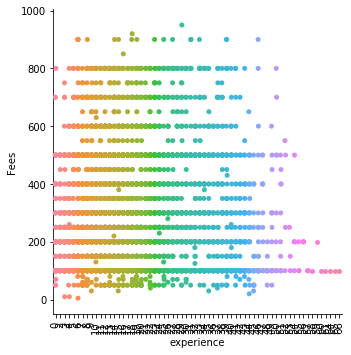

In [124]:
plt.figure(figsize=(15,10))
sns.catplot(x='experience',y='Fees',data=train_data)
plt.xticks(rotation=90)
plt.show()

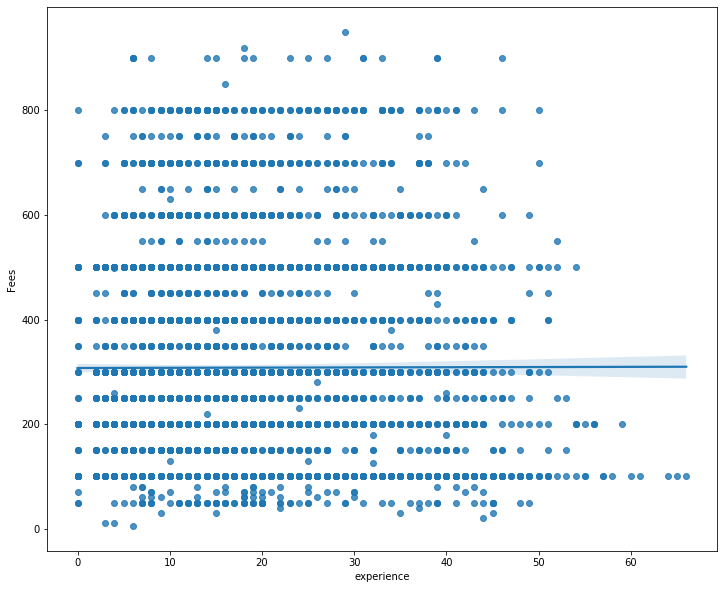

In [125]:
plt.figure(figsize=(12,10))
sns.regplot(x='experience',y='Fees',data=train_data)
plt.show()

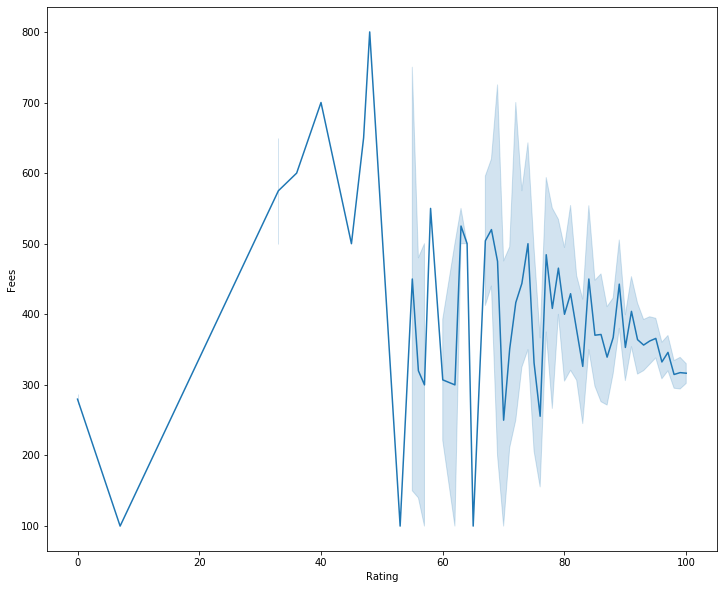

In [126]:
plt.figure(figsize=(12,10))
sns.lineplot(x='Rating',y='Fees',data=train_data)
plt.show()

In [127]:
#Correlation in training set
train_data.corr()

,Rating,Fees,experience
Rating,1.000000,0.153273,-0.038569
Fees,0.153273,1.000000,0.002117
experience,-0.038569,0.002117,1.000000


In [128]:
train_data.head(2)

,Rating,Profile,Fees,Q_1,Q_2,Q_3,experience,Locality,City
0,100,Homeopath,100,BHMS,MD - Homeopathy,XX,24,Kakkanad,Ernakulam
1,98,Ayurveda,350,BAMS,MD - Ayurveda Medicine,XX,12,Whitefield,Bangalore


In [129]:
# Now using LabelEncoder
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
train_data['Profile']=lb.fit_transform(train_data['Profile'])
train_data['Q_1']=lb.fit_transform(train_data['Q_1'])
train_data['Q_2']=lb.fit_transform(train_data['Q_2'])
train_data['Q_3']=lb.fit_transform(train_data['Q_3'])
train_data['Locality']=lb.fit_transform(train_data['Locality'])
train_data['City']=lb.fit_transform(train_data['City'])

In [130]:
train_data.head()

,Rating,Profile,Fees,Q_1,Q_2,Q_3,experience,Locality,City
0,100,5,100,8,252,406,24,296,4
1,98,0,350,5,241,406,12,855,0
2,0,3,300,79,334,406,9,452,0
3,0,0,250,12,7,406,12,68,0
4,100,0,250,5,426,406,20,335,1


In [131]:
train_data['fees']=train_data['Fees']
train_data.drop('Fees',axis=1,inplace=True)
train_data.head()

,Rating,Profile,Q_1,Q_2,Q_3,experience,Locality,City,fees
0,100,5,8,252,406,24,296,4,100
1,98,0,5,241,406,12,855,0,350
2,0,3,79,334,406,9,452,0,300
3,0,0,12,7,406,12,68,0,250
4,100,0,5,426,406,20,335,1,250


In [132]:
train_data.corr()

,Rating,Profile,Q_1,Q_2,Q_3,experience,Locality,City,fees
Rating,1.000000,-0.126389,-0.007733,-0.165534,-0.132647,-0.038569,-0.045634,-0.106276,0.153273
Profile,-0.126389,1.000000,0.307982,-0.000341,-0.037070,0.202073,0.016675,-0.017894,0.145226
Q_1,-0.007733,0.307982,1.000000,-0.416106,-0.178181,0.201556,0.005929,-0.024606,0.233285
Q_2,-0.165534,-0.000341,-0.416106,1.000000,0.238462,-0.045597,0.020500,0.039903,-0.177216
Q_3,-0.132647,-0.037070,-0.178181,0.238462,1.000000,-0.030725,0.008622,0.025523,-0.119550
experience,-0.038569,0.202073,0.201556,-0.045597,-0.030725,1.000000,0.000642,0.013826,0.002117
Locality,-0.045634,0.016675,0.005929,0.020500,0.008622,0.000642,1.000000,-0.065680,-0.063607
City,-0.106276,-0.017894,-0.024606,0.039903,0.025523,0.013826,-0.065680,1.000000,-0.041873
fees,0.153273,0.145226,0.233285,-0.177216,-0.119550,0.002117,-0.063607,-0.041873,1.000000


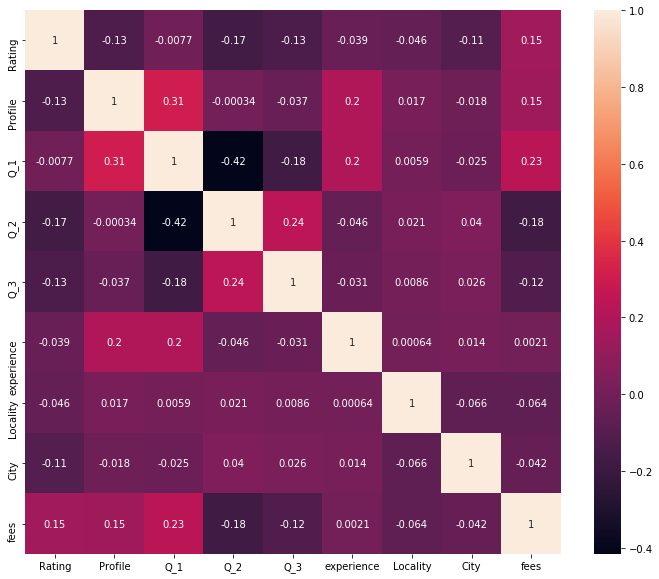

In [133]:
plt.figure(figsize=(12,10))
sns.heatmap(train_data.corr(),annot=True)

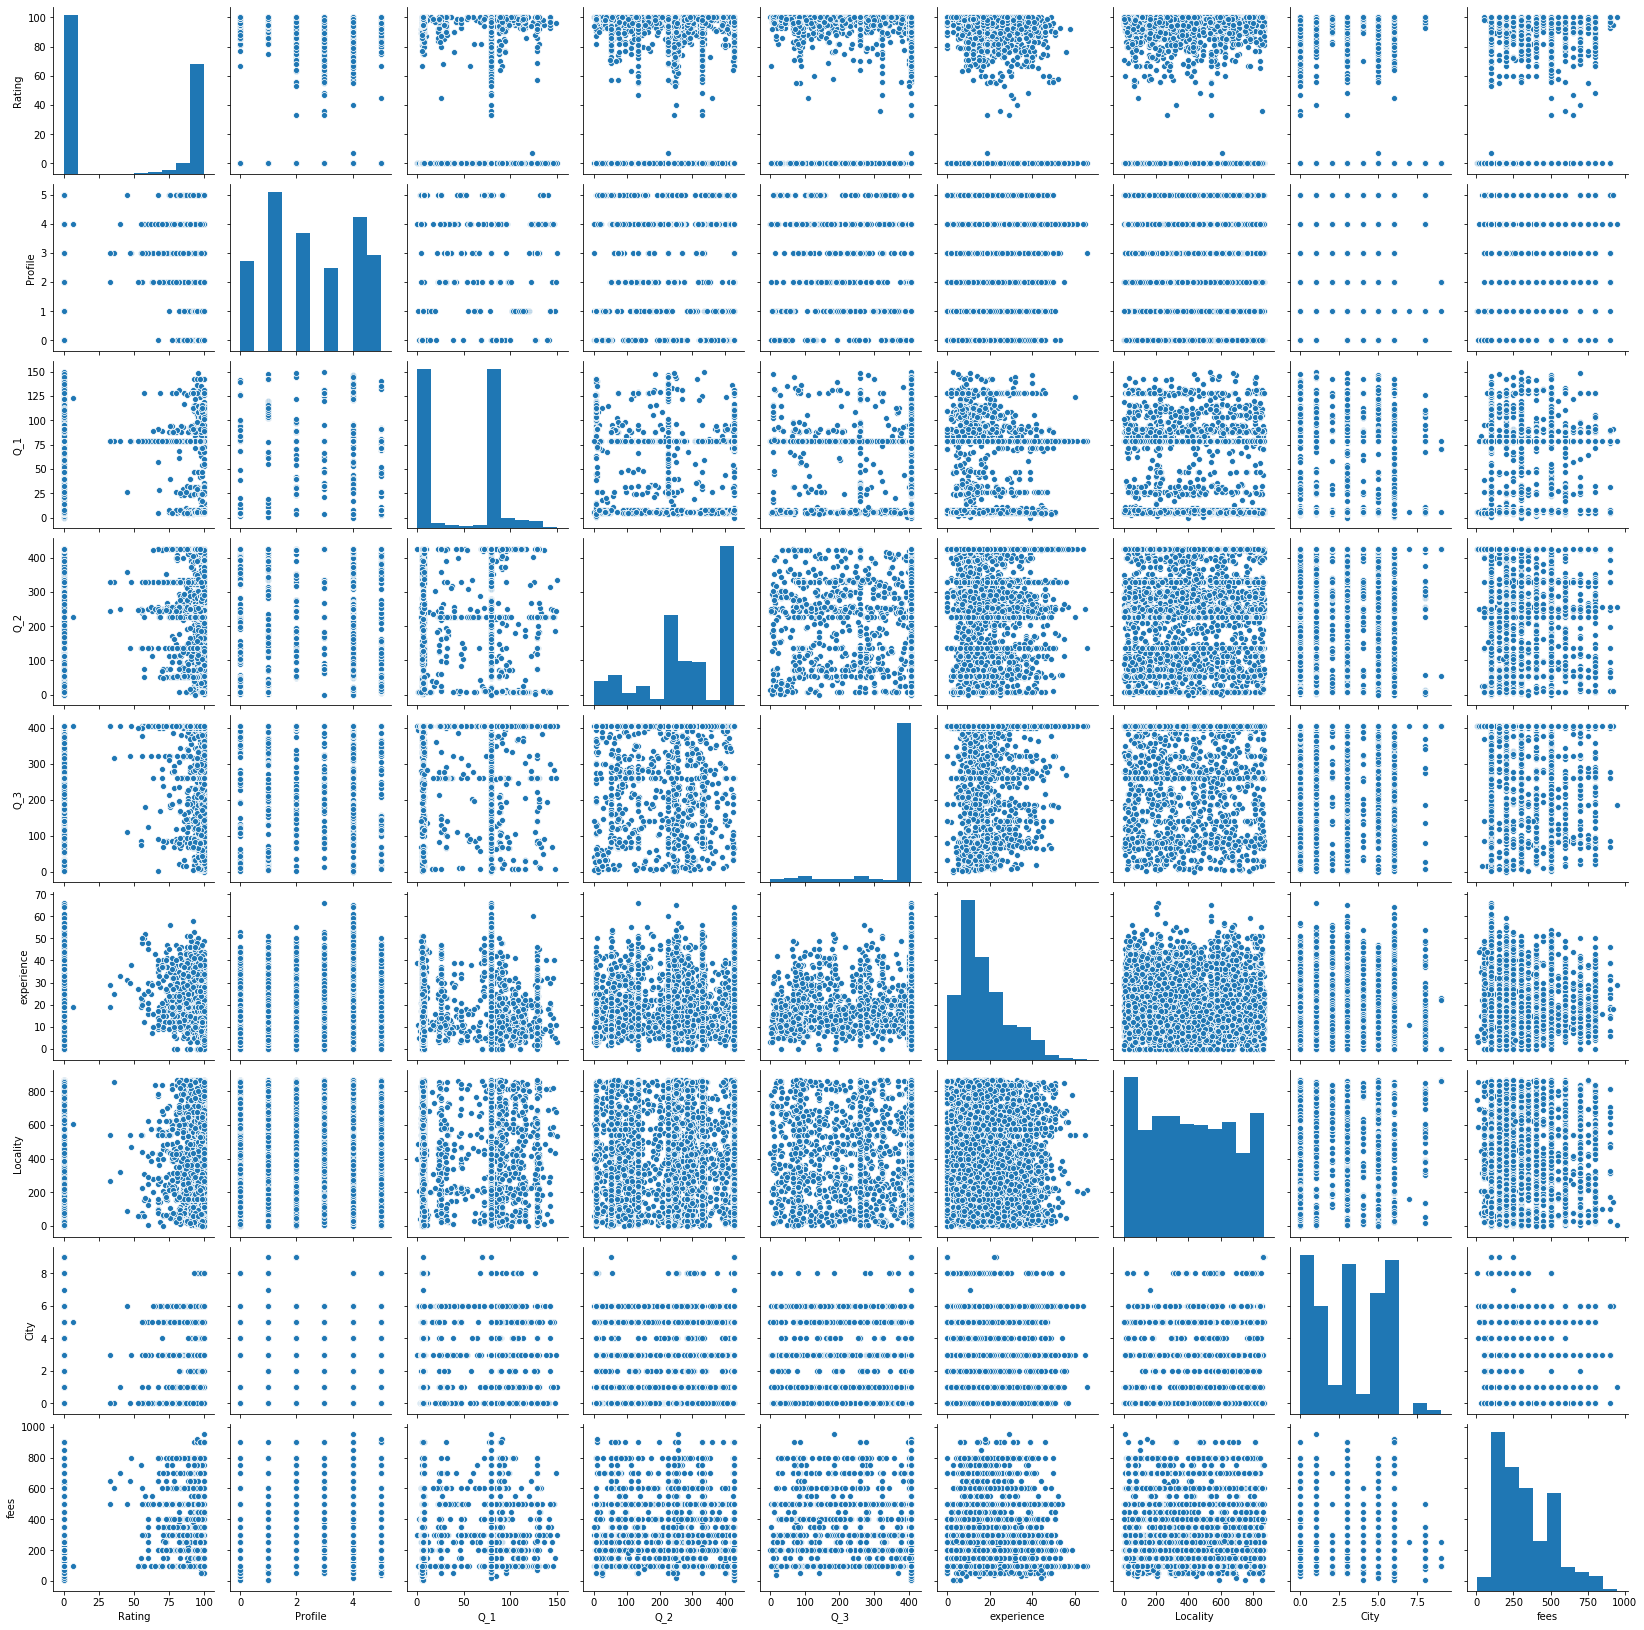

In [134]:
sns.pairplot(train_data)

# Test Data

In [135]:
test_data=pd.read_csv("Dr_Fee_Test.csv")
pd.set_option("display.max_columns",None)
test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [136]:
test_data.shape

(1987, 6)

In [137]:
type(test_data)

pandas.core.frame.DataFrame

In [138]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [139]:
test_data['Qualification'].value_counts()

BAMS                                                                                               153
BHMS                                                                                               150
BDS                                                                                                144
MBBS                                                                                               107
MBBS, MD - Dermatology                                                                              64
                                                                                                  ... 
MDS - Paedodontics And Preventive Dentistry, Membership of the Faculty of Dental Surgeons(MFDS)      1
MBBS, Diploma in Otorhinolaryngology (DLO), MS - ENT, FRCS - General Surgery                         1
MBBS, Post Graduate Diploma in Diabetology (PGDD), MD - Diabetology                                  1
MD - Dermatology, DNB - Dermatology & Venereology, MBBS                  

In [140]:
# Splitting Qualification and fill null value with 'XX'
test_data['Q_1']=test_data['Qualification'].str.split(',').str[0]
test_data['Q_2']=test_data['Qualification'].str.split(',').str[1]
test_data['Q_3']=test_data['Qualification'].str.split(',').str[2]
test_data['Q_4']=test_data['Qualification'].str.split(',').str[3]
test_data['Q_5']=test_data['Qualification'].str.split(',').str[4]

In [141]:
test_data['Q_1'].fillna("XX",inplace=True)
test_data['Q_2'].fillna("XX",inplace=True)
test_data['Q_3'].fillna("XX",inplace=True)
test_data['Q_4'].fillna("XX",inplace=True)
test_data['Q_5'].fillna("XX",inplace=True)

In [142]:
test_data['Q_5'].value_counts()

XX                                                                        1951
 MNAMS (Membership of the National Academy)                                  2
 PG Diploma In Clinical Cosmetology (PGDCC)                                  1
 Certificate Course In Cosmetic Dermatology & Lasers                         1
 MD - Medicine                                                               1
 FRCP                                                                        1
 Diploma of Clinical Hypnotherapy                                            1
 MBBS                                                                        1
 Fellowship in Diabetology                                                   1
 FRGUHS                                                                      1
 Diploma in Medical Law and Ethics (PGDMLE)                                  1
 Yoga Teachers Training Course                                               1
 BDS                                                

In [143]:
test_data['experience']=test_data['Experience'].str.slice(stop=2).astype(int)

In [144]:
test_data['Rating'].fillna('0%',inplace=True)
test_data['Rating']=test_data['Rating'].str.slice(stop=-1).astype(int)

In [145]:
# Splitting Place into Locality and City
test_data['Locality']=test_data['Place'].str.split(',').str[0]
test_data['City']=test_data['Place'].str.split(',').str[1]
test_data['Locality'].fillna("XX",inplace=True)
test_data['City'].fillna("XX",inplace=True)

In [146]:
test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Q_1,Q_2,Q_3,Q_4,Q_5,experience,Locality,City
0,MBBS,35 years experience,0,"Ghatkopar East, Mumbai",General Medicine,NaN,MBBS,XX,XX,XX,XX,35,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,0,"West Marredpally, Hyderabad",ENT Specialist,NaN,MBBS,Diploma in Otorhinolaryngology (DLO),XX,XX,XX,31,West Marredpally,Hyderabad
2,"MBBS, DDVL",40 years experience,70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",MBBS,DDVL,XX,XX,XX,40,KK Nagar,Chennai
3,BAMS,0 years experience,0,"New Ashok Nagar, Delhi",Ayurveda,NaN,BAMS,XX,XX,XX,XX,0,New Ashok Nagar,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,BDS,MDS - Conservative Dentistry & Endodontics,XX,XX,XX,16,Kanakpura Road,Bangalore


In [147]:
# dropping some columns
test_data.drop(['Qualification','Experience','Place','Miscellaneous_Info'],axis=1,inplace=True)
test_data.head(2)

,Rating,Profile,Q_1,Q_2,Q_3,Q_4,Q_5,experience,Locality,City
0,0,General Medicine,MBBS,XX,XX,XX,XX,35,Ghatkopar East,Mumbai
1,0,ENT Specialist,MBBS,Diploma in Otorhinolaryngology (DLO),XX,XX,XX,31,West Marredpally,Hyderabad


In [148]:
# Now using LabelEncoder
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
test_data['Profile']=lb.fit_transform(test_data['Profile'])
test_data['Q_1']=lb.fit_transform(test_data['Q_1'])
test_data['Q_2']=lb.fit_transform(test_data['Q_2'])
test_data['Q_3']=lb.fit_transform(test_data['Q_3'])
test_data['Q_4']=lb.fit_transform(test_data['Q_4'])
test_data['Q_5']=lb.fit_transform(test_data['Q_5'])
test_data['Locality']=lb.fit_transform(test_data['Locality'])
test_data['City']=lb.fit_transform(test_data['City'])

In [149]:
test_data.head()

,Rating,Profile,Q_1,Q_2,Q_3,Q_4,Q_5,experience,Locality,City
0,0,4,48,243,195,90,35,35,142,6
1,0,3,48,79,195,90,35,31,577,5
2,70,2,48,28,195,90,35,40,212,1
3,0,0,1,243,195,90,35,0,373,3
4,100,1,2,157,195,90,35,16,231,0


In [150]:
test_data.corr()

,Rating,Profile,Q_1,Q_2,Q_3,Q_4,Q_5,experience,Locality,City
Rating,1.000000,-0.134298,0.013873,-0.163191,-0.139097,-0.113324,-0.072494,-0.019059,-0.051361,-0.045163
Profile,-0.134298,1.000000,0.305932,-0.036077,-0.065267,-0.036890,-0.043158,0.154077,-0.005726,0.029252
Q_1,0.013873,0.305932,1.000000,-0.444317,-0.203518,-0.083947,-0.066844,0.197820,0.013279,-0.041851
Q_2,-0.163191,-0.036077,-0.444317,1.000000,0.221952,0.081754,0.028654,-0.035699,-0.000288,0.053101
Q_3,-0.139097,-0.065267,-0.203518,0.221952,1.000000,0.302152,0.176621,-0.052390,0.037730,0.038664
Q_4,-0.113324,-0.036890,-0.083947,0.081754,0.302152,1.000000,0.432879,-0.020382,0.028667,0.005989
Q_5,-0.072494,-0.043158,-0.066844,0.028654,0.176621,0.432879,1.000000,0.023394,-0.012334,0.022620
experience,-0.019059,0.154077,0.197820,-0.035699,-0.052390,-0.020382,0.023394,1.000000,0.025920,-0.008124
Locality,-0.051361,-0.005726,0.013279,-0.000288,0.037730,0.028667,-0.012334,0.025920,1.000000,-0.089350
City,-0.045163,0.029252,-0.041851,0.053101,0.038664,0.005989,0.022620,-0.008124,-0.089350,1.000000


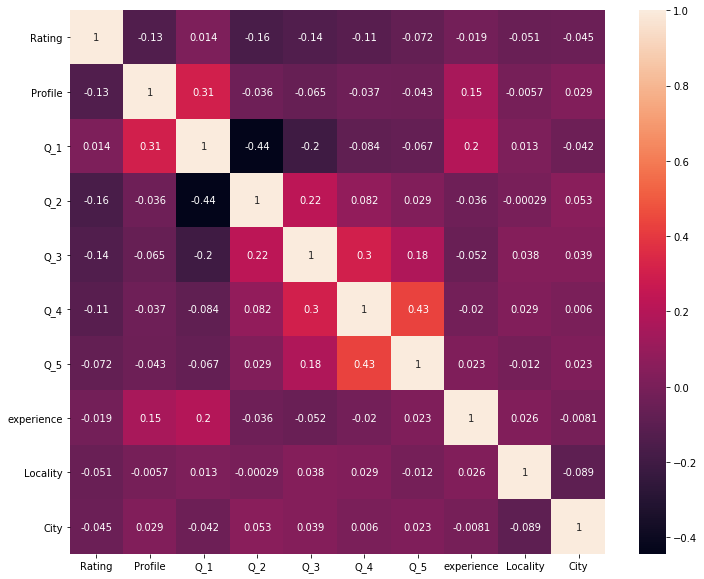

In [151]:
plt.figure(figsize=(12,10))
sns.heatmap(test_data.corr(),annot=True)
plt.show()

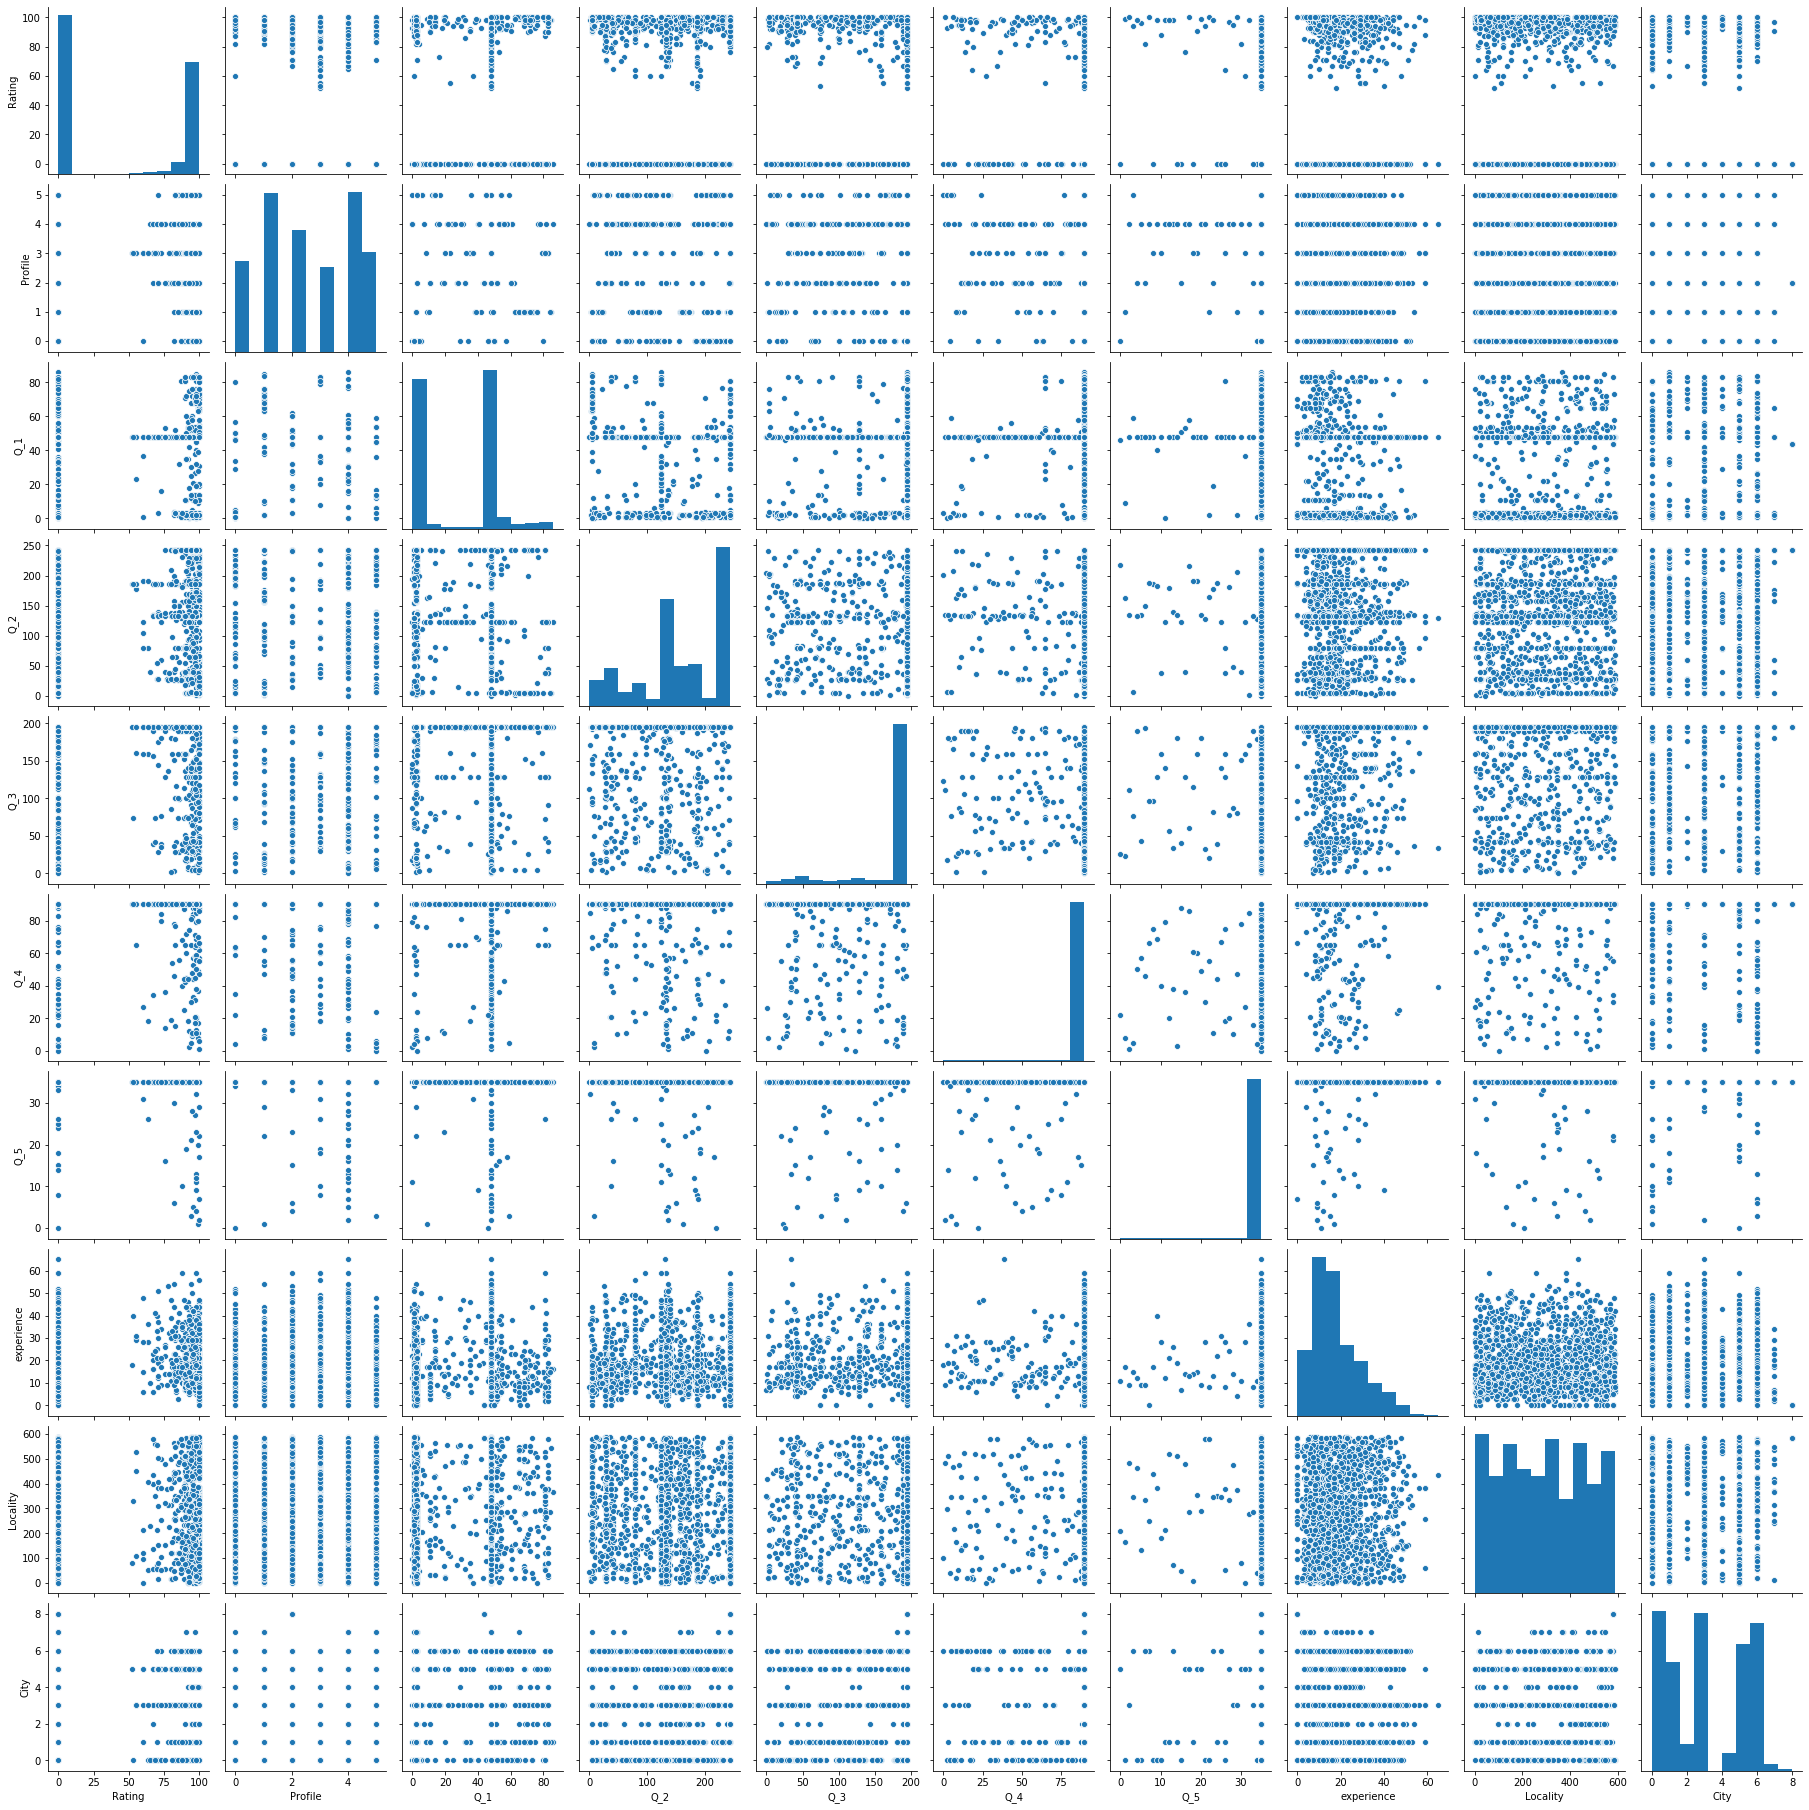

In [152]:
sns.pairplot(test_data)

# Removing the outliers from the training and testing dataset

In [153]:
print("train data shape before zscore", train_data.shape)
from scipy.stats import zscore
z=np.abs(zscore(train_data))
train_data=train_data[(z<3).all(axis=1)]
print("train data shape after zscore", train_data.shape)

train data shape before zscore (5961, 9)
train data shape after zscore (5776, 9)


In [154]:
print("train data shape before zscore", test_data.shape)
from scipy.stats import zscore
z=np.abs(zscore(test_data))
test_data=test_data[(z<3).all(axis=1)]
print("train data shape after zscore", test_data.shape)

train data shape before zscore (1987, 10)
train data shape after zscore (1866, 10)


In [155]:
train_data.skew()

Rating        0.261189
Profile       0.104111
Q_1           0.060377
Q_2          -0.627058
Q_3          -2.407439
experience    0.889190
Locality      0.113123
City          0.081475
fees          0.707121
dtype: float64

In [156]:
test_data.skew()

Rating         0.288070
Profile        0.037379
Q_1            0.057023
Q_2           -0.488766
Q_3           -2.573396
Q_4           -8.023761
Q_5          -33.100720
experience     0.862811
Locality       0.035941
City           0.006007
dtype: float64

Separating the test and train data in the same first as we do not want to use skewness on the target data which will alter the output variable.

In [157]:
x=train_data.iloc[:,0:-1]
y=pd.DataFrame(train_data.iloc[:,-1])
x.head()


,Rating,Profile,Q_1,Q_2,Q_3,experience,Locality,City
0,100,5,8,252,406,24,296,4
1,98,0,5,241,406,12,855,0
2,0,3,79,334,406,9,452,0
3,0,0,12,7,406,12,68,0
4,100,0,5,426,406,20,335,1


In [158]:
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.sqrt(x[i])

In [159]:
for i in test_data.columns:
    if test_data.skew()[i]>0.55:
        test_data[i]=np.sqrt(test_data[i])

In [160]:
x.skew()

Rating        0.261189
Profile       0.104111
Q_1           0.060377
Q_2          -0.627058
Q_3          -2.407439
experience    0.019085
Locality      0.113123
City          0.081475
dtype: float64

In [161]:
test_data.skew()

Rating         0.288070
Profile        0.037379
Q_1            0.057023
Q_2           -0.488766
Q_3           -2.573396
Q_4           -8.023761
Q_5          -33.100720
experience    -0.011422
Locality       0.035941
City           0.006007
dtype: float64

# Split into training and testing


In [162]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

def maxr2_score(regr,x,y):
    max_r2_score=0
    for r_state in range(42,100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(train_x,train_y)
        pred=regr.predict(test_x)
        r2score=r2_score(test_y,pred)
        print("The r2 score at", r_state ,"is", r2score)
        if r2score>max_r2_score:
            max_r2_score=r2score
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r2_score)
    return final_r_state

In [163]:
#Let use Linear Regression and check max r2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

The r2 score at 42 is 0.09426037863663572
The r2 score at 43 is 0.10363476942155914
The r2 score at 44 is 0.10979719651661113
The r2 score at 45 is 0.09679780817700301
The r2 score at 46 is 0.1078222416721335
The r2 score at 47 is 0.10727047048563587
The r2 score at 48 is 0.10868086957438639
The r2 score at 49 is 0.09134384474123503
The r2 score at 50 is 0.0965986795690843
The r2 score at 51 is 0.130056952492988
The r2 score at 52 is 0.10627786436675968
The r2 score at 53 is 0.1079333815137179
The r2 score at 54 is 0.11704423312884249
The r2 score at 55 is 0.09086987658416801
The r2 score at 56 is 0.09839442424591138
The r2 score at 57 is 0.09849626905696618
The r2 score at 58 is 0.10435790266880463
The r2 score at 59 is 0.12076024283500308
The r2 score at 60 is 0.09564995225154882
The r2 score at 61 is 0.09514515886776187
The r2 score at 62 is 0.08987522560215755
The r2 score at 63 is 0.0881206362895387
The r2 score at 64 is 0.09573430242648251
The r2 score at 65 is 0.1150454885615581

In [164]:
#Finalising the train and test data based on the above scores
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=73,test_size=0.20)

In [165]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4620, 8)
(4620, 1)
(1156, 8)
(1156, 1)


In [166]:
#Importing necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [167]:
#Checking gridsearch for different algorithms
sr=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sr,parameters)
gdsr.fit(x_train,y_train)
gdsr.best_params_

{'C': 10, 'kernel': 'rbf'}

In [168]:
knn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(knn,parameters)
gdk.fit(x_train,y_train)
gdk.best_params_

{'n_neighbors': 10}

In [169]:
# checking the model and its metrics by running a set of codes.
score=[]
cv=[]
MSE=[]
RMSE=[]
MAE=[]
    
from sklearn.preprocessing import LabelBinarizer

algorithm=[LinearRegression(),SVR(C= 10, kernel= 'rbf'),DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=10)]
for i in algorithm:
    l=i
    print(l)
    l.fit(x_train,y_train)
    pred=l.predict(x_test)
    r2score=r2_score(y_test,pred)
    print("R2 score", r2score)
    score.append(r2score)
    crossscore=cross_val_score(l,x,y,cv=5,scoring='r2').mean()
    print("The CV Score is", crossscore)
    cv.append(crossscore)
    mean_sqrd_error=mean_squared_error(y_test,pred)
    MSE.append(mean_sqrd_error)
    print("Mean Squared Error is", mean_sqrd_error )
    rootMSE=np.sqrt(mean_sqrd_error)
    RMSE.append(rootMSE)
    print("Root Mean Squared Error is: ",rootMSE)
    Meanabserror=mean_absolute_error(y_test,pred)
    MAE.append(Meanabserror)
    print("Mean Absolute Error is: ", Meanabserror)
    print("\n")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 score 0.1358028281164929
The CV Score is 0.09941627620094806
Mean Squared Error is 32140.94505871413
Root Mean Squared Error is:  179.27895877295285
Mean Absolute Error is:  146.4207966401118


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R2 score 0.0733179172595887
The CV Score is 0.06887583281519119
Mean Squared Error is 34464.86389597819
Root Mean Squared Error is:  185.64714890344584
Mean Absolute Error is:  146.5511498981328


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=

In [170]:
result=pd.DataFrame({'Model':['LinearRegression','SVR','DecisionTreeRegressor','KNeighborsRegressor'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':MSE, 'Root Mean Squared Error': RMSE, 'Mean Absolute Error':MAE})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error
0,LinearRegression,0.135803,0.099416,32140.945059,179.278959,146.420797
1,SVR,0.073318,0.068876,34464.863896,185.647149,146.551150
2,DecisionTreeRegressor,-0.532788,-0.513508,57006.964533,238.761313,174.014706
3,KNeighborsRegressor,0.065380,0.079716,34760.072734,186.440534,149.838581


In [171]:
#Since the models are not giving better scores, we can try Lasso 
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [172]:
#Lets check max r2 score when to use
lsreg=Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)

The r2 score at 42 is 0.09426039153381027
The r2 score at 43 is 0.10363508791826515
The r2 score at 44 is 0.10979722339642306
The r2 score at 45 is 0.09679767813970952
The r2 score at 46 is 0.10782159266412439
The r2 score at 47 is 0.10727013005337971
The r2 score at 48 is 0.10868010383148197
The r2 score at 49 is 0.09134308617085518
The r2 score at 50 is 0.09659884637364702
The r2 score at 51 is 0.1300565072713008
The r2 score at 52 is 0.10627783042573602
The r2 score at 53 is 0.10793416890307539
The r2 score at 54 is 0.11704396457178778
The r2 score at 55 is 0.09086963722463604
The r2 score at 56 is 0.09839472325636411
The r2 score at 57 is 0.09849599374283247
The r2 score at 58 is 0.10435776631038562
The r2 score at 59 is 0.1207600890392112
The r2 score at 60 is 0.09565035572498026
The r2 score at 61 is 0.09514469257352887
The r2 score at 62 is 0.08987556632569094
The r2 score at 63 is 0.088121013868807
The r2 score at 64 is 0.09573413423862909
The r2 score at 65 is 0.11504566820680

In [173]:
#Lets use cross val score with Lasso
print("Mean r2 score for Lasso Regression:", cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print("standard deviation in r2 score for Lasso Regression: ", cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())
#The lasso here is performing just like Linear Regression

Mean r2 score for Lasso Regression: 0.09941629277786364
standard deviation in r2 score for Lasso Regression:  0.007458320840369682


In [174]:
#Now we will have to use gradient boosting technique
#for getting best parameters we need to use grid search
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [175]:
#Now we will use cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
print("Mean r2 score for Gradient boosting Regression:", cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print("standard deviation in r2 score for Gradient boosting Regression: ", cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for Gradient boosting Regression: 0.19919178205478566
standard deviation in r2 score for Gradient boosting Regression:  0.011215987343843983


In [176]:
#Now we will have to use Adaboost Regression Algorithm 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lreg,lsreg,dt]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 0.1,
 'n_estimators': 1000}

In [177]:
ada_reg=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=1000,learning_rate=0.01)
ada_reg.fit(x_train,y_train)
ada_pred=ada_reg.predict(x_test)
print(ada_reg.score(x_train,y_train))
ada_reg.score(x_test,y_test)

0.9981591528814798


0.057385784926948236

In [178]:
#Now we will use cross val score to check the mean r2 score and standard deviation
ada_reg=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),learning_rate=0.01,n_estimators=1000)
print("Mean r2 score for Ada boosting Regression:", cross_val_score(ada_reg,x,y,cv=5,scoring='r2').mean())
print("standard deviation in r2 score for Ada boosting Regression: ", cross_val_score(ada_reg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Ada boosting Regression: 0.05691428564009395
standard deviation in r2 score for Ada boosting Regression:  0.017244422311242538


In [179]:
#Lets check the maximum r2 score corresponding to this
r_state=maxr2_score(ada_reg,x,y)

The r2 score at 42 is 0.034576978958967275
The r2 score at 43 is 0.09293611224733278
The r2 score at 44 is 0.03110426491255358
The r2 score at 45 is 0.04204904989899916
The r2 score at 46 is 0.06325174107242082
The r2 score at 47 is 0.06317652593298606
The r2 score at 48 is 0.11146500218246025
The r2 score at 49 is 0.092666258349132
The r2 score at 50 is 0.02370360371615654
The r2 score at 51 is 0.08952133921731753
The r2 score at 52 is 0.04712347032135278
The r2 score at 53 is 0.07827034015327738
The r2 score at 54 is 0.04642631333626368
The r2 score at 55 is 0.06339080949785336
The r2 score at 56 is 0.03537448033797008
The r2 score at 57 is 0.04374073260336209
The r2 score at 58 is 0.03910815911306431
The r2 score at 59 is 0.06436270740418804
The r2 score at 60 is 0.0492097370019875
The r2 score at 61 is 0.12834213990909382
The r2 score at 62 is 0.04227712652820936
The r2 score at 63 is 0.07764773315026186
The r2 score at 64 is 0.06947675406907106
The r2 score at 65 is 0.067736924925

In [180]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
r_state=maxr2_score(rf,x,y)

The r2 score at 42 is 0.14826432783804777
The r2 score at 43 is 0.21238941149185242
The r2 score at 44 is 0.15862100967316095
The r2 score at 45 is 0.1522971495307488
The r2 score at 46 is 0.1872927611818157
The r2 score at 47 is 0.2039136375963424
The r2 score at 48 is 0.19163743728517157
The r2 score at 49 is 0.18879326264141782
The r2 score at 50 is 0.189709337313978
The r2 score at 51 is 0.2054285224567587
The r2 score at 52 is 0.15021486042664411
The r2 score at 53 is 0.18914427225299013
The r2 score at 54 is 0.1797793349453719
The r2 score at 55 is 0.17950420036680004
The r2 score at 56 is 0.15105593329183875
The r2 score at 57 is 0.14701801885022536
The r2 score at 58 is 0.1560268941276458
The r2 score at 59 is 0.19494051511936605
The r2 score at 60 is 0.17604610962186196
The r2 score at 61 is 0.20721637091959744
The r2 score at 62 is 0.1407216716820019
The r2 score at 63 is 0.1957966069856374
The r2 score at 64 is 0.1757170335118423
The r2 score at 65 is 0.20410354641495143
The

In [181]:
rf=RandomForestRegressor()
print("Mean r2 score for RandomForestRegressor:", cross_val_score(rf,x,y,cv=10,scoring='r2').mean())
print("standard deviation in r2 score for RandomForestRegressor: ", cross_val_score(rf,x,y,cv=10,scoring='r2').std())

Mean r2 score for RandomForestRegressor: 0.18353463367067901
standard deviation in r2 score for RandomForestRegressor:  0.033258200289671434


In [182]:
#After trying all above let us finalise the model. RandomForestRegressor is providing the highest accuracy score at 23%
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)

print("The RMSE is", np.sqrt(mean_squared_error(y_test,pred)))
print("The r2_score is", r2_score(y_test,pred))

The RMSE is 175.37202262876804
The r2_score is 0.17305843800576237


In [183]:
pred_test=rf.predict(x_test)

pred_test=pd.DataFrame(pred_test)

In [184]:
pred_test.to_csv("Dr_Fees_Prediction.csv")

In [185]:
from sklearn.externals import joblib

#save the model as pickle in  a file
joblib.dump(rf,'Dr_Fee_Prediction.pkl')

['Dr_Fee_Prediction.pkl']